# `Central Limit Theorem Proof`

---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## `Data`: Age column of Churn Modeling

## `Population Mean`

In [3]:
mean_age=data['Age'].mean()
mean_age

38.9218

## `Population Std`

In [14]:
std_age=data['Age'].std()
std_age

10.487806451704591

## `Distribution of Age`
### Population Distribution

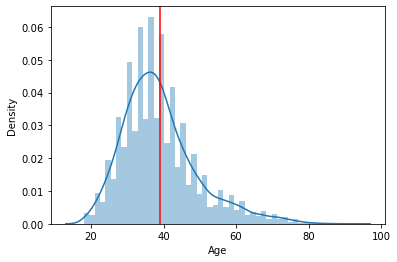

In [15]:
sns.distplot(data['Age'])
plt.axvline(mean_age,color='r')

In [16]:
data.shape

(10000, 14)


---

## `Samples as a whole`

## `500 samples of 20 each = 10000`

In [7]:
n=20
samples=[data.Age.sample(n) for i in range(500)]   # stratified sampling 20 * 500 = 10000

## mean of samples

In [8]:
np.mean(samples)

38.9545

## std of samples

In [9]:
np.std(samples)

10.629582764624395

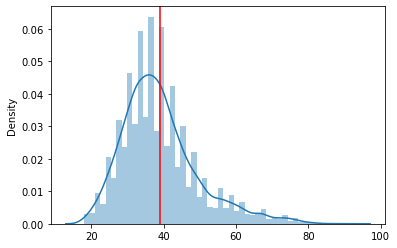

In [10]:
sns.distplot(samples)
plt.axvline(np.mean(samples),color='r')

# ---Proof of CLT---

For Sample Size: 2 
Confidence Interval is (48.6652106530637, 28.582789346936302) 
Mean=38.624 
Standard Error =5.123066659726379


For Sample Size: 5 
Confidence Interval is (43.491397876193886, 35.03980212380611) 
Mean=39.2656 
Standard Error =2.1560193245887196


For Sample Size: 10 
Confidence Interval is (40.94737924490977, 36.95382075509025) 
Mean=38.95060000000001 
Standard Error =1.0187649208723275


For Sample Size: 30 
Confidence Interval is (39.5147566348326, 38.13711003183406) 
Mean=38.82593333333333 
Standard Error =0.3514404599486076


For Sample Size: 100 
Confidence Interval is (39.25230400764524, 38.84169599235475) 
Mean=39.047 
Standard Error =0.10474694267614688


For Sample Size: 300 
Confidence Interval is (39.02887425821402, 38.89035240845266) 
Mean=38.95961333333334 
Standard Error =0.035337206571774964


For Sample Size: 500 
Confidence Interval is (38.93562139090204, 38.85278660909795) 
Mean=38.894203999999995 
Standard Error =0.021131321888798148


For Sample 

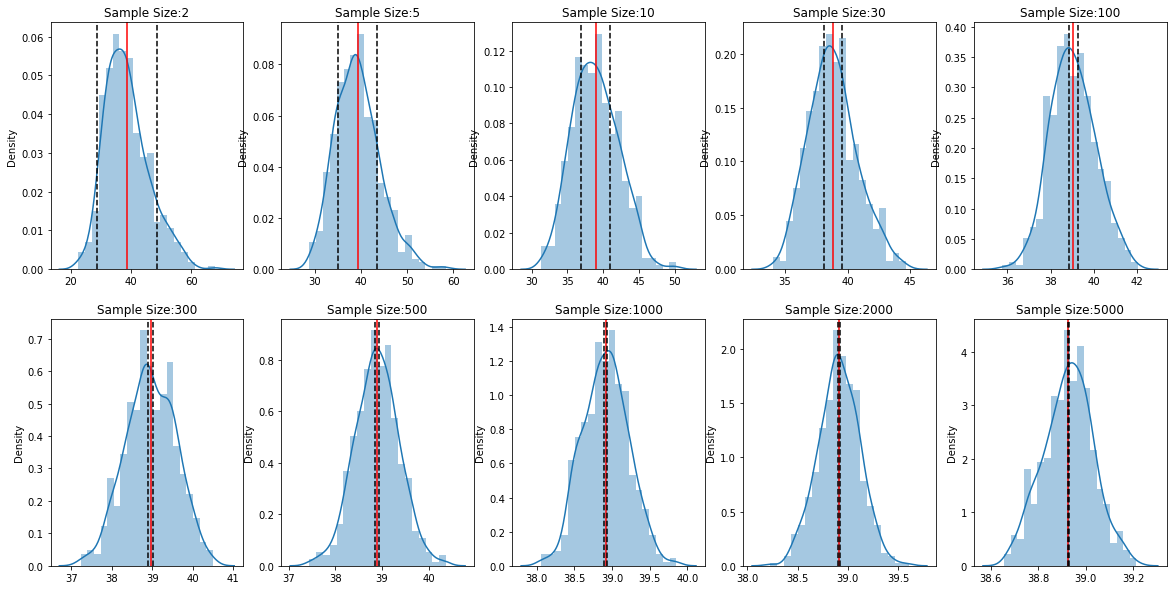

In [11]:
n=[2,5,10,30,100,300,500,1000,2000,5000]   # no of samples
cfi=[]
plt.figure(figsize=(20,10))
for index,sample_size in enumerate(n):
    sample_means=[data.Age.sample(sample_size).mean() for i in range(500)]  # size of each sample is 500
    plt.subplot(2,5,index+1)   # for subplots
    sns.distplot(sample_means,bins=20)
    plt.axvline(np.mean(sample_means),color='r') # mean
    plt.axvline((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='black',linestyle='dashed') # upper bound
    plt.axvline((np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='black',linestyle='dashed') # lower bound
    cfi=((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size))),(np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size))))))
    plt.title('Sample Size:'+str(sample_size))
    print(f'For Sample Size: {sample_size} \nConfidence Interval is {cfi} \nMean={np.mean(sample_means)} \nStandard Error ={np.std(sample_means)/np.sqrt(sample_size)}\n\n')

## As number of sample increases the Standard error decreases

## `NOTE: We take std of sample in standard error`

# ---Thank you---